In [97]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [98]:
# read the data
ssdata = pd.read_csv("310320_articles_sentence-level_ss.csv")
asdata = pd.read_csv("310320_MTurk_article_labels_agreed.csv")

In [99]:
print(ssdata.columns)
print(asdata.columns)

Index(['new_id', 'sentence', 'snlp_sentiment_score'], dtype='object')
Index(['article_id', 'category', 'article_x', 'sentiment_label',
       'sentiment_score'],
      dtype='object')


In [100]:
ssdata.columns = ['article_id','sentence','ss']
asdata.columns = ['article_id', 'category', 'article', 'sentiment_label','as']

In [101]:
data = pd.merge(asdata, ssdata, on='article_id')
print(data.columns)
print(len(data.index))

Index(['article_id', 'category', 'article', 'sentiment_label', 'as',
       'sentence', 'ss'],
      dtype='object')
10620


In [102]:
data=data.dropna()

In [103]:
sent_count.head()

,article_id,ss
0,143454,21
1,143459,42
2,143515,26
3,143560,34
4,143813,17


In [104]:
max(sent_count['ss'])

72

(array([44., 69., 55., 35., 32., 21., 19., 13., 12.,  5.]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 10 Patch objects>)

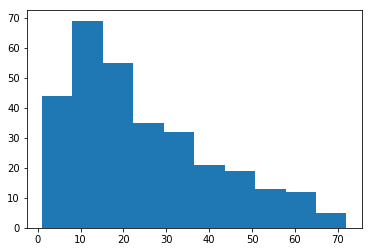

In [105]:
%matplotlib inline
plt.hist(sent_count['ss'])

In [106]:
sent_count = sent_count[sent_count['ss'] <= 75]
print(len(sent_count.index))

305


In [107]:
sent_count.head(20)
print(max(sent_count['ss']))

72


In [108]:
rdata = pd.DataFrame()

count = 1

for aid, groupdata in data.groupby(['article_id']):
    d = {}
    
    if aid in sent_count['article_id'].tolist():
        d.update({'article_id': aid})
        d.update({'Y': int(max(groupdata['as']))})
    
        for i in groupdata.index:
            si = "s" + "{:02d}".format(count)
            d.update({si: int(groupdata.loc[i,'ss'])})       
            count += 1

        if count < 72:
            for c in range(count, 73):
                si = "s" + "{:02d}".format(c)
                d.update({si:int(0)})

        count = 1
        rdata = rdata.append(d,ignore_index=True)

rdata = rdata.set_index('article_id')
print(rdata.head())

              Y  s01  s02  s03  s04  s05  s06  s07  s08  s09 ...   s63  s64  \
article_id                                                   ...              
143454.0    3.0  1.0  4.0  1.0  4.0  0.0  0.0  0.0  0.0  1.0 ...   0.0  0.0   
143459.0    4.0  4.0  2.0  3.0  3.0  0.0  3.0  3.0  2.0  2.0 ...   0.0  0.0   
143515.0    3.0  1.0  1.0  1.0  4.0  2.0  2.0  3.0  1.0  1.0 ...   0.0  0.0   
143560.0    3.0  3.0  1.0  3.0  4.0  1.0  1.0  0.0  1.0  3.0 ...   0.0  0.0   
143813.0    3.0  4.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0  0.0 ...   0.0  0.0   

            s65  s66  s67  s68  s69  s70  s71  s72  
article_id                                          
143454.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
143459.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
143515.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
143560.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
143813.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 73 columns]


In [109]:
rdata.to_csv("articles_for_regression.csv")

# OLS Regression

In [110]:
import statsmodels.api as sm 

X = rdata.loc[:, rdata.columns != 'Y'] ## X usually means our input variables (or independent variables)
y = rdata.loc[:, rdata.columns == 'Y'] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

/NAS/home01/toshal/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/NAS/home01/toshal/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/NAS/home01/toshal/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/NAS/home01/toshal/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     1.255
Date:                Wed, 08 Apr 2020   Prob (F-statistic):              0.110
Time:                        18:57:01   Log-Likelihood:                -396.81
No. Observations:                 305   AIC:                             931.6
Df Residuals:                     236   BIC:                             1188.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4009      0.221      6.338      0.000       0.965       1.836
s01            0.1228      0.053      2.307      0.022       0.018       0.228
s02            0.1916      0.056      3.450      0.001       0.082       0.301
s03            0.0783      0.055      1.414      0.159      -0.031       0.187
s04            0.0737      0.051      1.442      0.151      -0.027       0.174
s05            0.0389      0.060      0.651      0.515      -0.079       0.157
s06            0.0014      0.052      0.026      0.979      -0.101       0.103
s07            0.0542      0.055      0.988      0.324      -0.054       0.162
s08            0.0495      0.056      0.885      0.377      -0.061       0.160
s09           -0.0773      0.055     -1.415      0.158      -0.185       0.030
s10           -0.0058      0.057     -0.101      0.920      -0.118       0.107
s11           -0.0518      0.059     -0.874      0.383      -0.169       0.065
s12            0.0914      0.060      1.518      0.130      -0.027       0.210
s13            0.1052      0.061      1.713      0.088      -0.016       0.226
s14           -0.0343      0.060     -0.569      0.570      -0.153       0.084
s15           -0.0670      0.067     -1.006      0.316      -0.198       0.064
s16            0.0852      0.062      1.371      0.172      -0.037       0.208
s17            0.0543      0.065      0.840      0.402      -0.073       0.182
s18           -0.0583      0.066     -0.889      0.375      -0.187       0.071
s19           -0.0267      0.065     -0.410      0.682      -0.155       0.102
s20           -0.0126      0.080     -0.159      0.874      -0.169       0.144
s21            0.1023      0.080      1.285      0.200      -0.054       0.259
s22           -0.1622      0.077     -2.102      0.037      -0.314      -0.010
s23           -0.1260      0.080     -1.573      0.117      -0.284       0.032
s24            0.1053      0.081      1.297      0.196      -0.055       0.265
s25            0.0114      0.085      0.135      0.893      -0.155       0.178
s26            0.1517      0.115      1.316      0.189      -0.075       0.379
s27           -0.2297      0.110     -2.091      0.038      -0.446      -0.013
s28           -0.0730      0.110     -0.665      0.507      -0.289       0.143
s29           -0.0324      0.105     -0.308      0.758      -0.240       0.175
s30            0.1512      0.111      1.367      0.173      -0.067       0.369
s31           -0.0917      0.100     -0.914      0.362      -0.289       0.106
s32           -0.0418      0.110     -0.380      0.704      -0.258       0.175
s33           -0.0031      0.126     -0.024      0.981      -0.251       0.245
s34            0.1990      0.141      1.409      0.160      -0.079       0.477
s35            0.1175      0.122      0.962      0.337      -0.123       0.358
s3

In [114]:
file = open("ols_regression_ouput.csv","w")
file.write(model.summary().as_csv())
file.close()